In [1]:
import torchvision
import numpy as np
from Classes.NeuralNetwork import NeuralNetwork
import Viz.Plots as plot

# Aufgabe 1

In [2]:
#load Train- and Test-Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Convert images and labels to NumPy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## Train Dataset

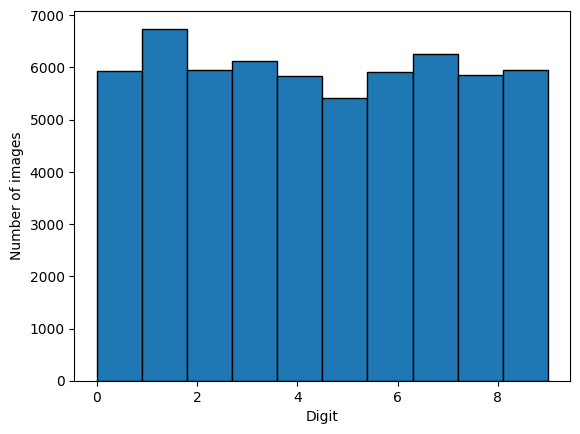

In [3]:
plot.show_hist(train_labels)

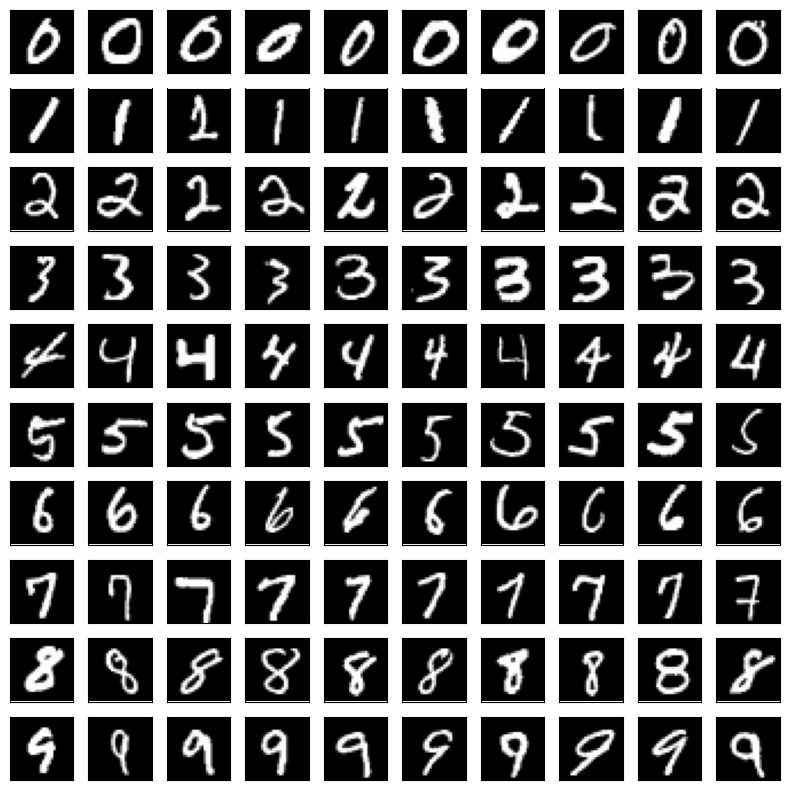

In [4]:
plot.show_image_matrix(train_images, train_labels)

## Test Dataset

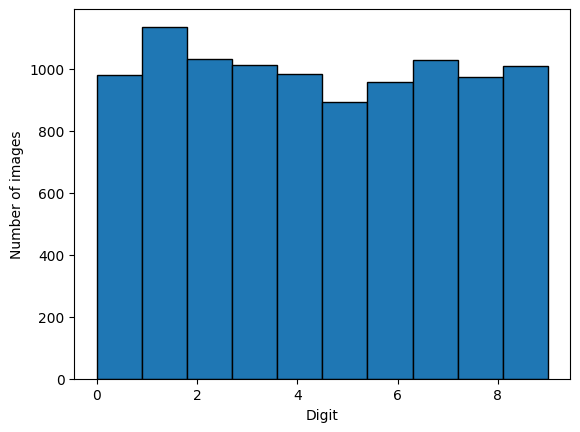

In [5]:
plot.show_hist(test_labels)

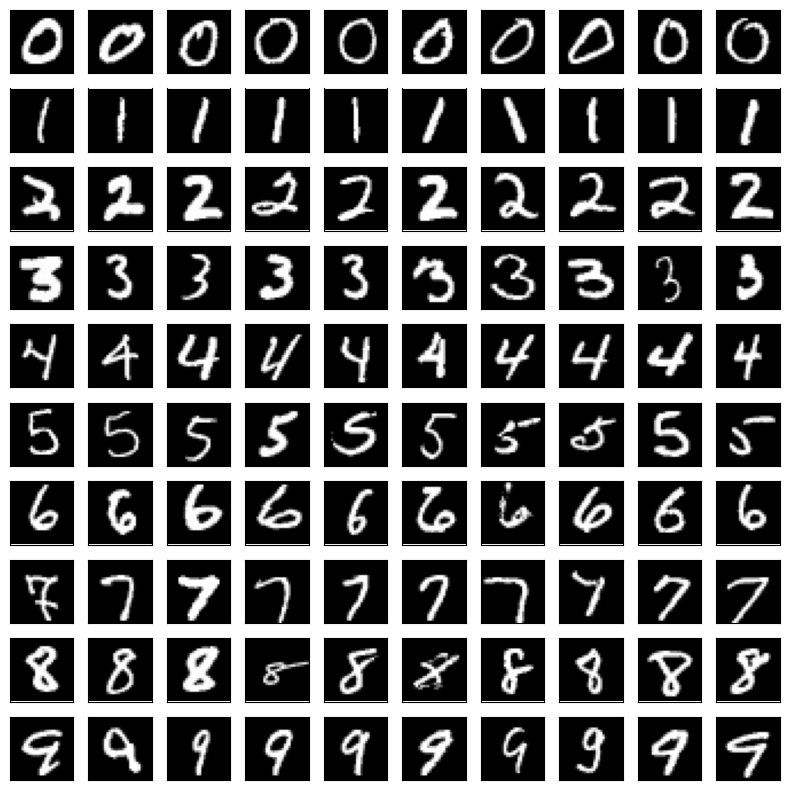

In [6]:
plot.show_image_matrix(test_images, test_labels)

# Aufgabe 2

## Testfälle für die LinearLayer-Klasse

### Test des Forward-Passes

Die Funktion `test_forward_pass` testet die Forward-Pass-Berechnung der `LinearLayer`.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`

Die erwartete Ausgabe `A_expected` wird wie folgt berechnet:

$$
A_{\text{expected}} = \text{Eingabe} \cdot \text{Gewichte}^T + \text{Bias}
$$

Durch manuelles Berechnen der Matrixoperationen:

$$
A_{\text{expected}} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.3 \\ 0.2 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix} = \begin{bmatrix} 1.0 & 1.6 \\ 2.1 & 3.5 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test des Backward-Passes

Die Funktion `test_backward_pass` prüft den Backward-Pass der `LinearLayer`-Klasse, bei dem die Gradienten in Bezug auf die Eingaben und Parameter der Schicht berechnet werden. Dieser Test verwendet festgelegte Eingabedaten und vorgegebene Gewichte, um die Korrektheit der berechneten Gradienten zu überprüfen.

#### Gegeben

- **Eingabedaten**: `[[1, 2], [3, 4]]`
- **Gewichte**: `[[0.1, 0.2], [0.3, 0.4]]`
- **Bias**: `[0.5, 1.0]` (als 1D-Array angepasst, um dem Design der `LinearLayer`-Klasse zu entsprechen)
- **Ausgabegradient** (willkürlich für den Test): `[[0.5, 0.6], [0.7, 0.8]]`

#### Berechnung der erwarteten Gradienten

##### Eingabegradient (expected_dA)

Der Eingabegradient `expected_dA` wird als Produkt des Ausgabegradienten und der Gewichte berechnet:

$$
\text{expected\_dA} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \times \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}
$$

$$
\text{expected\_dA} = \begin{bmatrix} 0.23 & 0.34 \\ 0.31 & 0.46 \end{bmatrix}
$$

##### Gewichtegradient (expected_weight_gradient)

Der Gewichtegradient `expected_weight_gradient` wird als Produkt des Ausgabegradienten und der Eingabedaten, dividiert durch die Anzahl der Eingaben (Batch-Größe), berechnet:

$$
\text{expected\_weight\_gradient} = \frac{1}{2} \times \begin{bmatrix} 0.5 & 0.7 \\ 0.6 & 0.8 \end{bmatrix} \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} = \begin{bmatrix} 1.3 & 1.9 \\ 1.5 & 2.2 \end{bmatrix}
$$

##### Biasgradient (expected_bias_gradient)

Der Biasgradient `expected_bias_gradient` wird als Summe der Zeilen des Ausgabegradienten berechnet:

$$
\text{expected\_bias\_gradient} = \sum \begin{bmatrix} 0.5 + 0.7 \\ 0.6 + 0.8 \end{bmatrix} = \begin{bmatrix} 1.2 \\ 1.4 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test der Parameteraktualisierung

Die Funktion `test_parameter_update` testet die Aktualisierung von Parametern mithilfe von Gradienten und einer Lernrate.

Gegeben:
- Anfängliche Gewichte: `[[0.5, 0.7], [0.3, 0.4]]`
- Anfänglicher Bias: `[[0.1], [0.2]]`
- Gewichtegradient: `[[-0.2, 0.1], [0.3, -0.1]]`
- Biasgradient: `[[-0.05], [0.03]]`
- Lernrate: `0.1`

Die erwarteten aktualisierten Gewichte und Bias werden wie folgt berechnet:

$$
\text{Erwartete Gewichte} = \text{Anfängliche Gewichte} - \text{Lernrate} \times \text{Gewichtegradient}
$$
$$
\text{Erwarteter Bias} = \text{Anfänglicher Bias} - \text{Lernrate} \times \text{Biasgradient}
$$

Durch manuelle Anwendung der Aktualisierungsregel:

$$
\text{Erwartete Gewichte} = \begin{bmatrix} 0.5 & 0.7 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.2 & 0.1 \\ 0.3 & -0.1 \end{bmatrix}
$$
$$
\text{Erwarteter Bias} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.05 \\ 0.03 \end{bmatrix}
$$

Der Test bestätigt, dass die Funktion zur Parameteraktualisierung die Gewichte und den Bias entsprechend den Gradienten und der Lernrate korrekt anpasst.


# Aufgabe 3

In [7]:
# Normalize images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Convert labels for binary classification (1 for digit 5, 0 for all other digits)
digit = 5
binary_train_labels = (train_labels == digit).astype(np.float32).reshape(-1, 1)
binary_test_labels = (test_labels == digit).astype(np.float32).reshape(-1, 1)

# Flatten the images for simplicity (28x28 to 784)
binary_train_images = train_images.reshape(train_images.shape[0], -1)
binary_test_images = test_images.reshape(test_images.shape[0], -1)

## Kostenfunktion (Loss Function)

Für binäre Klassifikationsaufgaben ist die binäre Kreuzentropie (Binary Cross-Entropy, BCE) eine häufig verwendete Kostenfunktion. Sie ist definiert als:

$$
BCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Hierbei ist:
- $N$ die Anzahl der Beispiele im Datensatz,
- $y_i$ der tatsächliche Labelwert (0 oder 1) und
- $\hat{y}_i$ der vom Netzwerk vorhergesagte Wert.

Diese Funktion ist besonders geeignet, weil sie die Wahrscheinlichkeit, die durch die Sigmoid-Aktivierungsfunktion des Output-Knotens modelliert wird, direkt berücksichtigt und Strafen für falsche Klassifikationen auf eine Art und Weise anwendet, die gut mit dem Optimierungsprozess zusammenarbeitet.



## Evaluationsfunktion (Evaluation Function)

Für die Bewertung der Modellleistung bei binärer Klassifikation ist die Genauigkeit (Accuracy) eine intuitive Metrik:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Diese Metrik ist einfach zu verstehen und gibt den Anteil der korrekt vorhergesagten Beispiele an der Gesamtzahl der Beispiele an.


## Alternative Optionen
Eine Alternative zur binären Kreuzentropie ist der Mean Squared Error (MSE), der jedoch weniger geeignet für Klassifikationsprobleme ist, da die Interpretation der Outputs als Wahrscheinlichkeiten nicht direkt berücksichtigt wird. MSE ist auch empfindlicher gegenüber Ausreißern, was zu einem langsameren Konvergenzverhalten führen kann.

Als alternative Evaluationsfunktion könnten Metriken wie Precision, Recall und F1-Score betrachtet werden, besonders wenn der Datensatz unausgeglichen ist. Diese Metriken geben einen detaillierteren Einblick in die Leistung des Klassifikators, was in manchen Anwendungsfällen vorteilhaft sein kann.

In [8]:
import Train_Models.Binary_Train as bt

In [9]:
input_dim = 784  # 28*28
hidden_dim = 128
output_dim = 1
hidden_layers = 1
learning_rate = 0.01

model = NeuralNetwork(input_dim, hidden_dim, output_dim, hidden_layers, learning_rate)

In [10]:
epochs = 20
patience = 1
batch_size = 64

train_losses, test_losses, train_accuracies, test_accuracies = bt.binary_train_model(
    model, binary_train_images, binary_train_labels, binary_test_images, binary_test_labels, epochs, patience, batch_size
)

Epoch 1, Train Loss: 0.25390410747337966, Test Loss: 0.24868246000380823, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 2, Train Loss: 0.2170020484299782, Test Loss: 0.21046215213257874, Train Accuracy: 0.9110166666666667, Test Accuracy: 0.9125
Epoch 3, Train Loss: 0.18816839796106077, Test Loss: 0.1812065007579934, Train Accuracy: 0.92535, Test Accuracy: 0.9297
Epoch 4, Train Loss: 0.16751111081020106, Test Loss: 0.16067433511447968, Train Accuracy: 0.9379333333333333, Test Accuracy: 0.943
Epoch 5, Train Loss: 0.15341118326308598, Test Loss: 0.14691452087788076, Train Accuracy: 0.9459666666666666, Test Accuracy: 0.95
Epoch 6, Train Loss: 0.1428073871792146, Test Loss: 0.13631986975806135, Train Accuracy: 0.9492833333333334, Test Accuracy: 0.9522
Epoch 7, Train Loss: 0.13533452522410727, Test Loss: 0.12890591837657872, Train Accuracy: 0.9524166666666667, Test Accuracy: 0.9545
Epoch 8, Train Loss: 0.1297197665703405, Test Loss: 0.12326369620162081, Train Accuracy: 0.95485, Test A

## Aufgabe 4

In [11]:
epochs = 50
patience = 10
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_layer_sizes = [4, 8, 16]
do_break = True

# Call the function to evaluate all combinations
binary_evaluation_results = bt.binary_evaluate_combinations(
    binary_train_images, binary_train_labels, binary_test_images, binary_test_labels, epochs, patience, batch_size, learning_rates, hidden_layer_sizes, do_break
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 0.29080292723008994, Test Loss: 0.2874437208234885, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 2, Train Loss: 0.277089116394294, Test Loss: 0.27324695150927514, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 3, Train Loss: 0.2596413681912423, Test Loss: 0.2553555574952648, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 4, Train Loss: 0.23810405686346015, Test Loss: 0.23320780217667997, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 5, Train Loss: 0.21732455151109856, Test Loss: 0.21194367378403617, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 6, Train Loss: 0.19718986391351465, Test Loss: 0.19180207058407855, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 7, Train Loss: 0.18025917327335247, Test Loss: 0.17498225960516692, Train Accuracy: 0.9209666666666667, Test Accuracy: 0.9262
Epoch 8, Train Loss: 0.1663350616222834, Test Loss: 0.1610965651199836, Train Accu

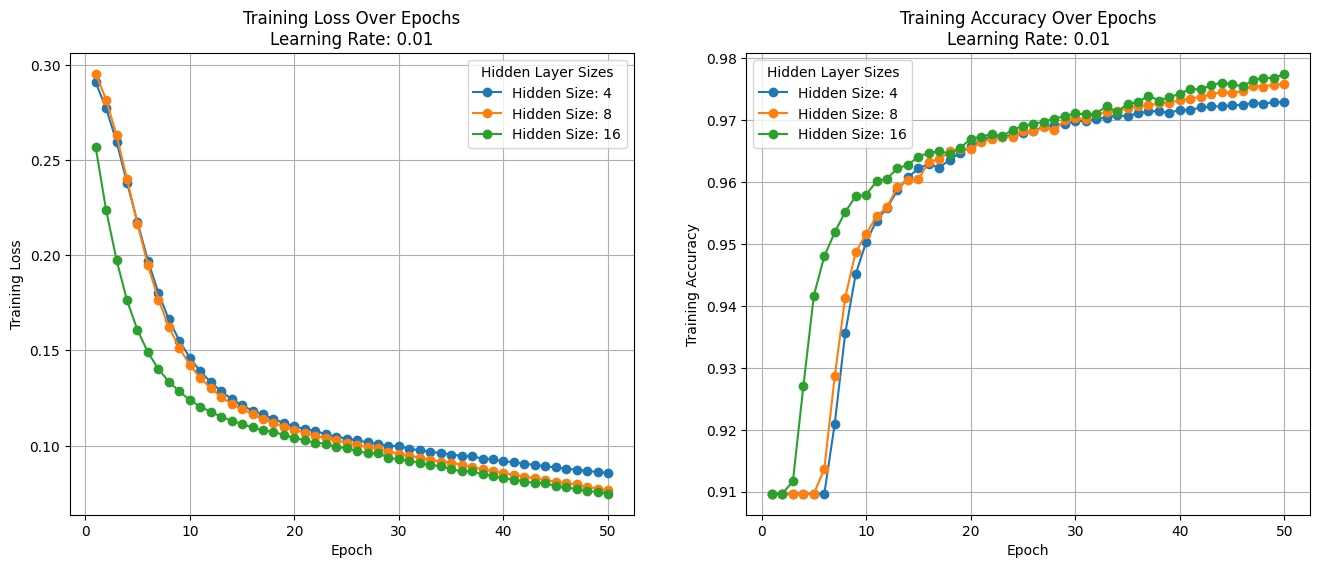

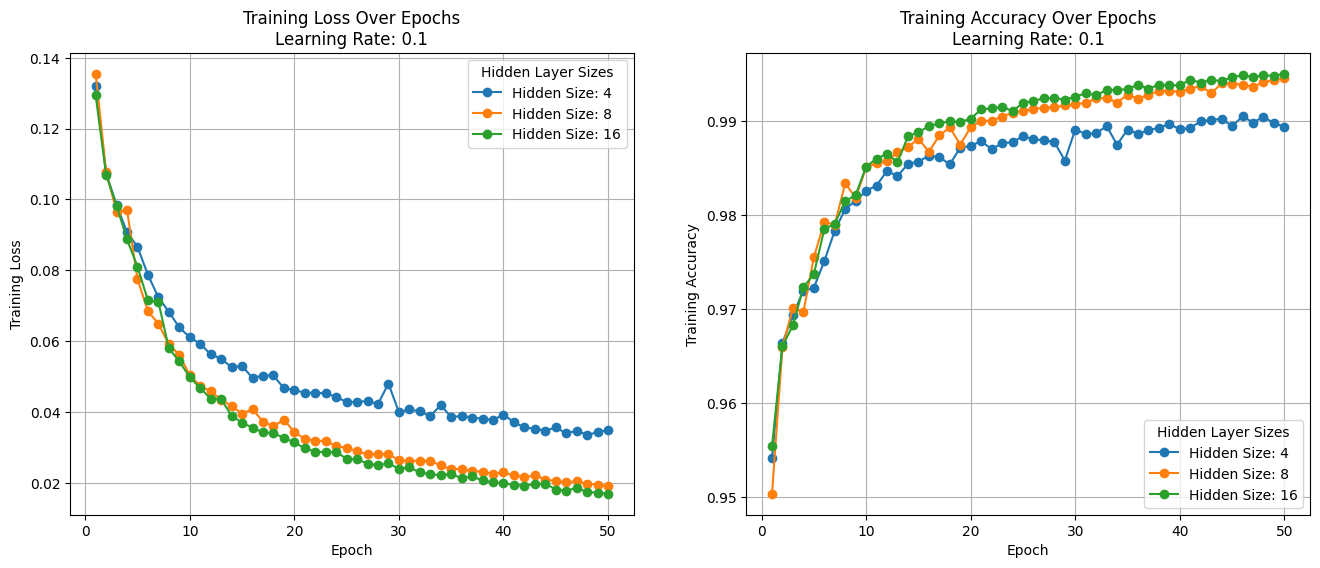

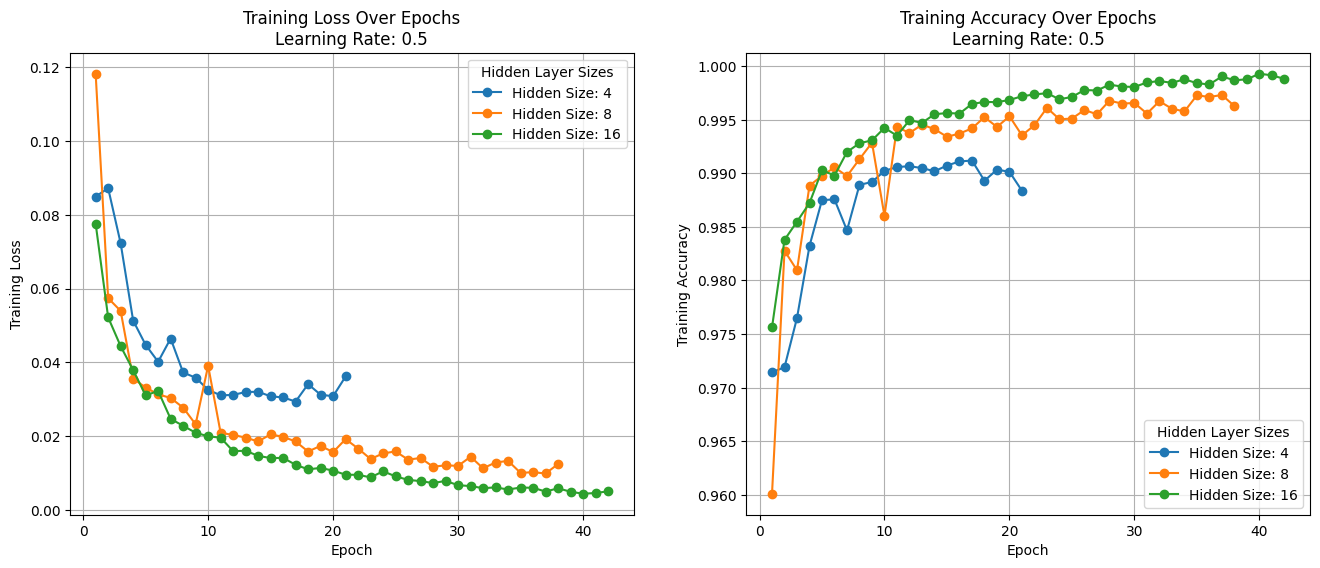

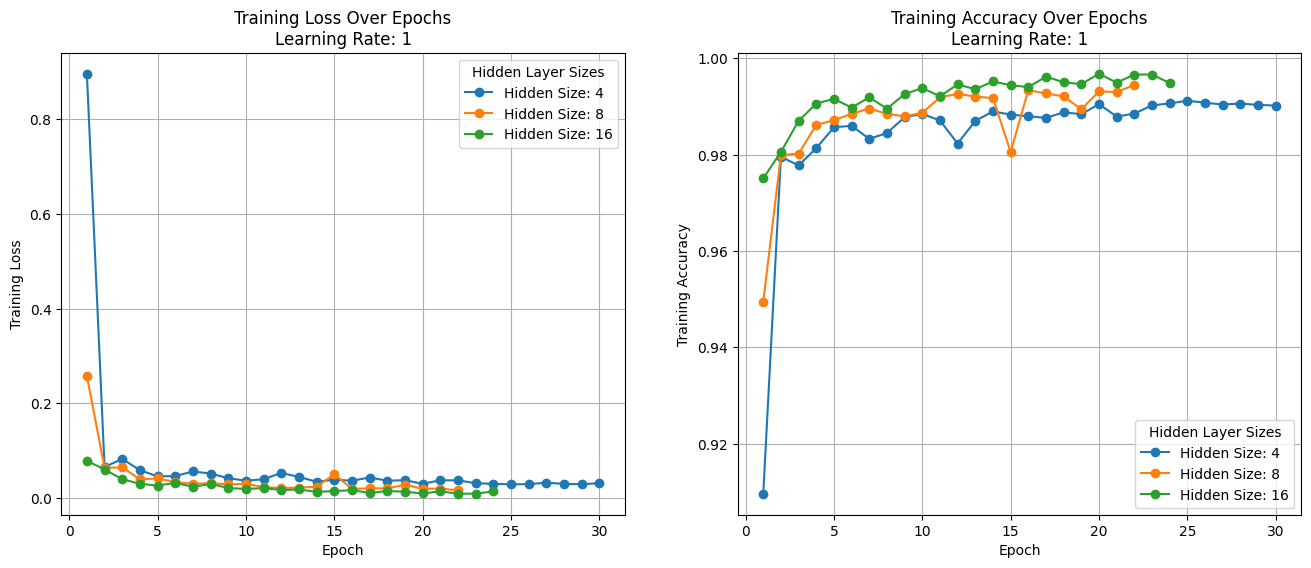

In [12]:
plot.show_evaluation_results(binary_evaluation_results)

## Aufgabe 5

In [13]:
import Train_Models.Categorial_Train as ct

In [14]:
def one_hot_encode(labels, num_classes=None):
    if num_classes is None:
        num_classes = labels.max() + 1
    return np.eye(num_classes)[labels]

In [15]:
categorical_train_labels = one_hot_encode(train_labels)
categorical_test_labels = one_hot_encode(test_labels)

# Flatten the images for simplicity (28x28 to 784)
categorical_train_images = train_images.reshape(train_images.shape[0], -1)
categorical_test_images = test_images.reshape(test_images.shape[0], -1)

In [18]:
epochs = 50
patience = 10
batch_size = 256  # Example batch size
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_layer_sizes = [4, 8, 16]
do_break = False

# Call the function to evaluate all combinations
categorical_evaluation_results = ct.categorical_evaluate_combinations(
    categorical_train_images, categorical_train_labels, categorical_test_images, categorical_test_labels, epochs, patience, batch_size, learning_rates, hidden_layer_sizes, do_break
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 2.302201460393869, Test Loss: 2.3021399369539184, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch 2, Train Loss: 2.3025882152045933, Test Loss: 2.3026246521149907, Train Accuracy: 0.09863333333333334, Test Accuracy: 0.0958
Epoch 3, Train Loss: 2.302520752690485, Test Loss: 2.3025413912604846, Train Accuracy: 0.09915, Test Accuracy: 0.1009
Epoch 4, Train Loss: 2.302325384667732, Test Loss: 2.302286754170458, Train Accuracy: 0.0993, Test Accuracy: 0.1032
Epoch 5, Train Loss: 2.3023035232697686, Test Loss: 2.302219338125992, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch 6, Train Loss: 2.302436344121146, Test Loss: 2.3023995075554806, Train Accuracy: 0.09915, Test Accuracy: 0.1009
Epoch 7, Train Loss: 2.3025256454022407, Test Loss: 2.302549556183051, Train Accuracy: 0.09871666666666666, Test Accuracy: 0.098
Epoch 8, Train Loss: 2.302217120154336, Test Loss: 2.3022039093

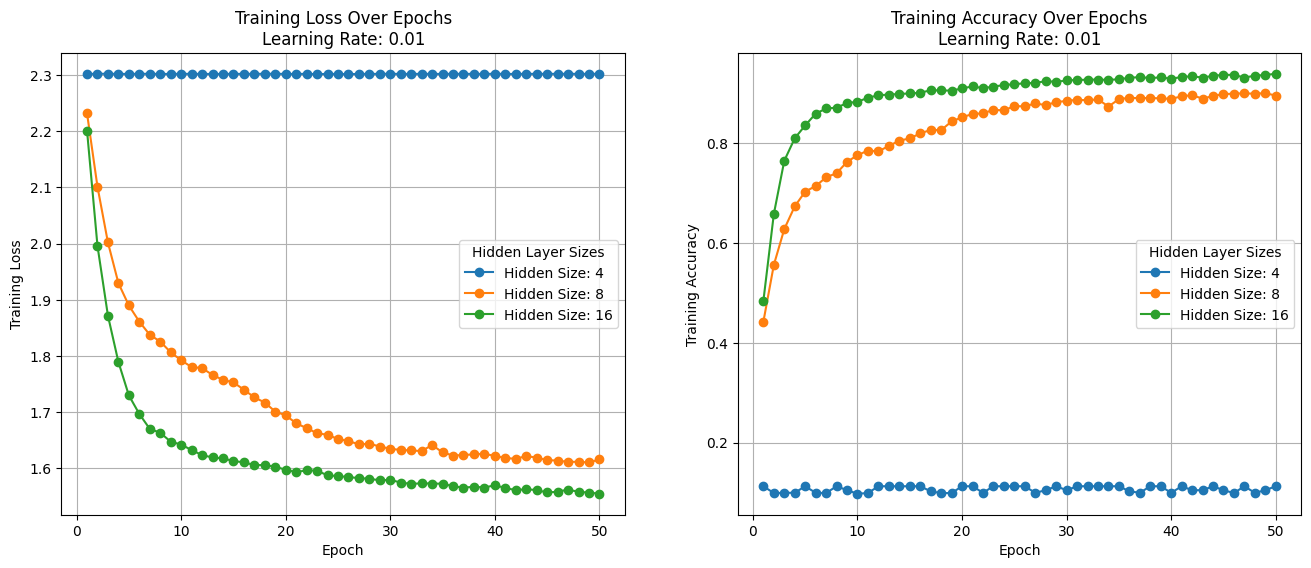

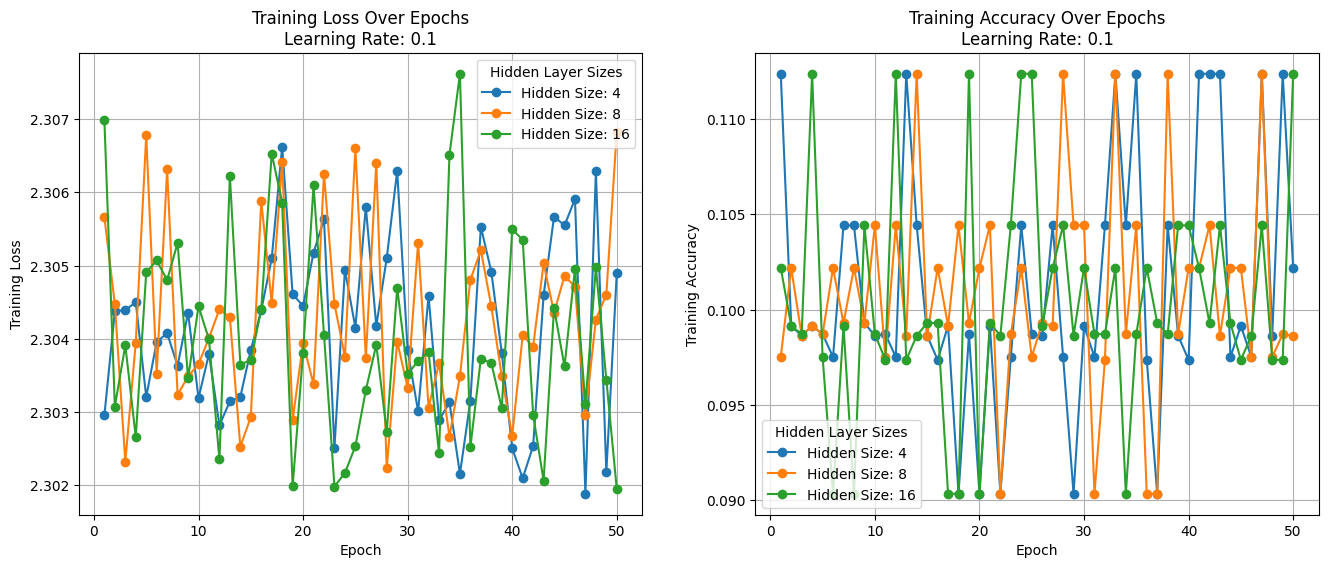

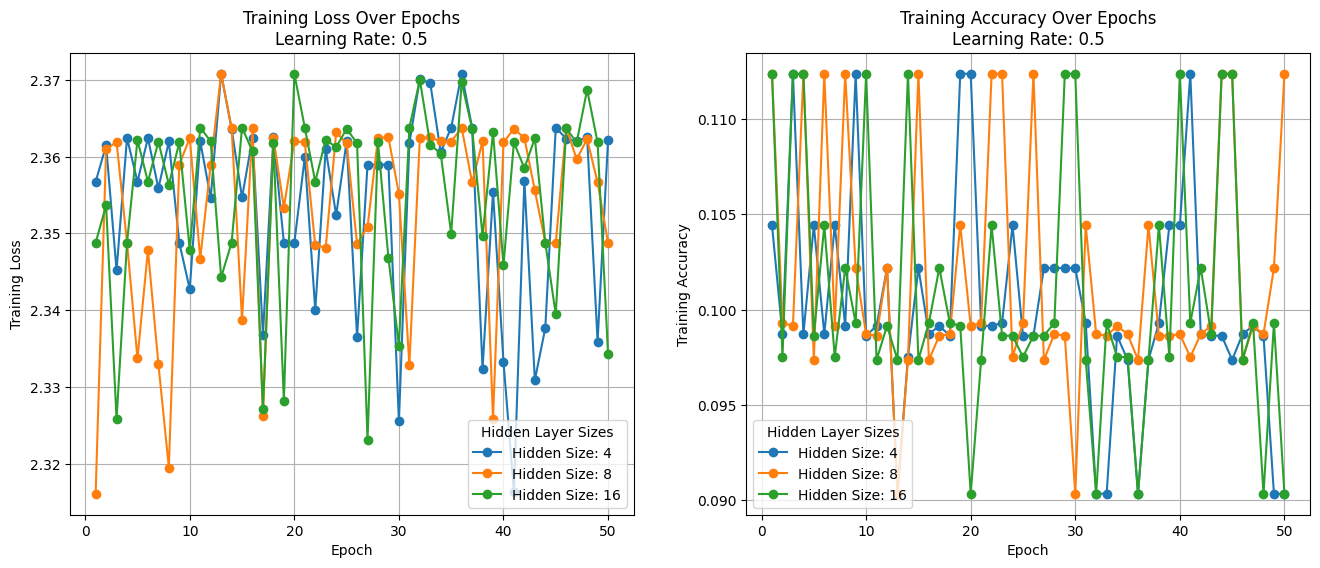

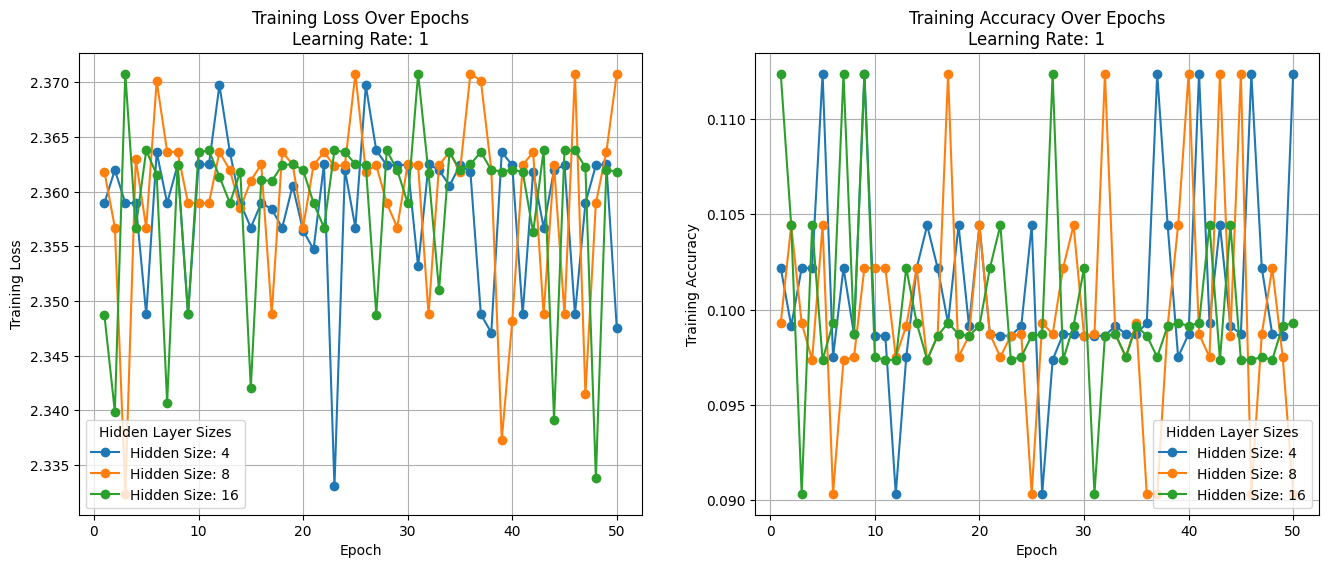

In [19]:
plot.show_evaluation_results(categorical_evaluation_results)